# Humo(u)r

"You know that scene in Animal House, it is a fellow playing folk music on a guitar, and John Belushi picks up the guitar and destroys it...Well, the British comedian would want to play a folk singer. We want to play the failure." 

--Stephen Fry (<a href='http://lybio.net/tag/stephen-fry-on-american-vs-british-comedy-transcription/'>interview+transcript</a>)


Kudos to this super helpful <a href='http://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/'>post on creating LSTMs in Keras</a>

In [102]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
np.random.seed(7)

# Game plan
Ok so the game plan for me then is to

1. Identify unique words in the text (names, places, various entities) that could be used to distinguish shows and replace them with a generic identifier (xxNamexx)
2. Format the text into workable chunks. Chunks of size 200 words should be good
3. Train the model

# Load and clean text

Because British shows are <a href='https://www.youtube.com/watch?v=OT7TR3Td6KQ'>notoriously short</a>, I'll be combining The Office UK with Peep Show to get some extra data

* http://www.springfieldspringfield.co.uk/episode_scripts.php?tv-show=the-office-us
* http://www.springfieldspringfield.co.uk/episode_scripts.php?tv-show=the-office-uk
* http://www.springfieldspringfield.co.uk/episode_scripts.php?tv-show=peep-show-2003

In [3]:
us_folders=['office_us']
uk_folders=['office_uk','peep_show']

And let's try to make sure the classifier doesn't just capitalize on differences in English vs. American spelling

In [4]:
def replace_strings(x):
    replace_dic={" '":" ", \
                "okay":"ok",\
                 "Okay":"ok",\
                "\n":" ",\
                "apologise":"apologize",\
                "humour":"humor",\
                 "colour":"color",\
                 "flavour":"flavor",\
                 "favour":"favor",\
                 "labour":"labor",\
                 "neighbour":"neighbor",\
                 "favourite":"favorite",\
                 "centre":"center",\
                 "fibre":"fiber",\
                 "litre":"liter",\
                 "theatre":"theater",\
                 "organise":"organize",\
                 "recognise":"recognize",\
                 "realise":"realize",\
                 "civilisation":"civilization",\
                 "analyse":"analyze",\
                 "defence":"defense",\
                 "offence":"offense",\
                 "licence":"license",\
                 "mum":"mom",\
                 "arsehole":"asshole",\
                 "tenner":'ten',\
                 "lads":"guys",\
                 "quid":"buck",\
                 "telly":"TV",\
                 " loo ": "bathroom ",\
                 " loo.":" bathroom.",\
                 "wanker ":"bastard ",\
                 "wanking ":"screwing ",\
                 "tits":"boobs",\
                 "wank ":"bastard ",\
                 "pint":"beer",\
                 "prick":"dick",\
                 "snog":"kiss",\
                 "crisps":"fries",\
                 "lazer":"laser",\
                 "twat":"jerk",
                 "shag":"screw"\
                 
                }
    for i in replace_dic.keys():
        x=x.replace(i,replace_dic[i])
    return x


How long should the passages be?

In [5]:
parse_size=200

In [6]:
uk_data=[]
uk_show=[]
for fold_name in uk_folders:
    uk_fold=os.path.join('data',fold_name)
    curr_files=os.listdir(uk_fold)
    curr_files=[i for i in curr_files if i[-3:]=='txt']
    for fname in curr_files:
        curr_fname=os.path.join(uk_fold,fname)
        with open(curr_fname,'rb') as curr_f:
            temp=replace_strings(curr_f.read().lower())
            uk_curr_text=unicode(temp.decode('utf-8'))
            uk_show.append(fold_name)
            uk_data.append(uk_curr_text)
        

In [7]:
sum([len(i)/(parse_size*5) for i in uk_data]) # 5 is ~ average word length

1300

In [8]:
us_data=[]
us_show=[]
for fold_name in us_folders:
    us_fold=os.path.join('data',fold_name)
    curr_files=os.listdir(us_fold)
    curr_files=[i for i in curr_files if i[-3:]=='txt']    
    for fname in curr_files:
        curr_fname=os.path.join(us_fold,fname)
        with open(curr_fname,'rb') as curr_f:
            temp=replace_strings(curr_f.read().lower())
            us_curr_text=unicode(temp.decode('utf-8'))
            us_show.append(fold_name)
            us_data.append(us_curr_text)

In [9]:
sum([len(i)/(parse_size*5) for i in us_data])

1516

In [10]:
tfidf_words=[]
for j in range(1,302,20):
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=1,
                                       max_features=j,
                                       stop_words='english')
#     tfidf_values=tfidf_vectorizer.fit_transform([' '.join(us_data), \
#                                                  ' '.join([i[0] for i in zip(uk_data,uk_show) if i[1]=='office_uk']), \
#                                                  ' '.join([i[0] for i in zip(uk_data,uk_show) if i[1]=='peep_show'])] \
#                                                )
    tfidf_values=tfidf_vectorizer.fit_transform([' '.join(us_data), \
                                             ' '.join(uk_data)]
                                           )
    tfidf_words.append(tfidf_vectorizer.get_feature_names())
    
    print 'New Words for TF-IDF='+str(j)
    if len(tfidf_words)>1:
        print [i for i in tfidf_words[-1] if i not in tfidf_words[-2]]
    else:
        print tfidf_words
    

New Words for TF-IDF=1
[[u'dwight']]
New Words for TF-IDF=21
[u'angela', u'cos', u'darryl', u'dobby', u'dunder', u'erin', u'gabe', u'gareth', u'jez', u'kelly', u'kevin', u'mifflin', u'phyllis', u'schrute', u'scranton', u'soph', u'sophie', u'stanley', u'suze', u'toby']
New Words for TF-IDF=41
[u'angus', u'arse', u'bollocks', u'cece', u'cock', u'corrigan', u'elena', u'fucked', u'gail', u'gerard', u'halpert', u'holly', u'ian', u'jo', u'mose', u'nellie', u'philly', u'sabre', u'scott', u'senator']
New Words for TF-IDF=61
[u'bloke', u'bullshit', u'california', u'ceo', u'deangelo', u'dobs', u'employee', u'erm', u'jlb', u'learned', u'lice', u'loads', u'mall', u'mural', u'packer', u'sarah', u'todd', u'toni', u'val', u'zahra']
New Words for TF-IDF=81
[u'blimey', u'dickhead', u'dundies', u'halloween', u'hay', u'lager', u'lf', u'luke', u'named', u'paedo', u'pennsylvania', u'phillip', u'printers', u'sofa', u'sorted', u'strangler', u'swindon', u'tallahassee', u'truck', u'wuphf']
New Words for TF-IDF

Ok so we start off strong with names and then there's a mix of proper nouns. I'm going to remove the words in the first 100 and then the proper nouns in the 100-300.

In [43]:
# will need to revise this by hand if update data
pronouns=['cornell','keenan','tallahassee','paula','philadelphia ','shirley','todd', \
          'valerie','aberdeen','brandon','athlead','blake','camilla','nick','orgazoid', \
          'rolf','strangler','columbus','dave','obama','binghamton','drake','enya','beesly','iris', \
          'justine','nelson','bez','eva','bristol','lamar','nate','walter','anton','bertram','gerrard' \
          ,'oliver','norris','robert','michael','scott','pbs','barney','daryl','glee','keith','ravi', \
          'sarah','sweeney','lipton','natalie','nance','jordan','heather','malcolm', \
          'kapoor','hastings','jim','jeremy','andy','nashua','steffan','hannon', \
         'cally','helene','corfu','saz','mikanos','gettysburg','isabel','dartmouth','joshy']

words_to_remove=tfidf_words[5]+pronouns

In [12]:
from spacy.en import English
nlp = English()

In [13]:
def proc_text(curr_data,words_to_remove):
    parsed_data = nlp(curr_data)
    lemma_data=[w.lemma_ for w in parsed_data if (w.pos_!='PUNCT' and w.pos_!='NUM' and w.pos_!='SPACE')]
    rem_data=['xxNamexx' if w in words_to_remove else w for w in lemma_data]
    return rem_data

In [14]:
us_data_proc=[' '.join(proc_text(doc,words_to_remove)) for doc in us_data]
uk_data_proc=[' '.join(proc_text(doc,words_to_remove)) for doc in uk_data]

And now uk/us_data_proc contains the text with the show-specific words replaced by xxNamexx

# Numeric vectorized representation

Now turn these texts into numbers that the algorithm can actually use. I'm going to use the CountVectorize function to find the 5000 most frequent words to use.

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
n_features=5000
tf_vectorizer = CountVectorizer(min_df=2,max_features=n_features,stop_words='english')
tf_vectorizer.fit(us_data_proc+uk_data_proc)
tf_words=tf_vectorizer.get_feature_names()
freqs=np.reshape(np.asarray(np.mean(tf_vectorizer.transform(us_data_proc+uk_data_proc),axis=0)),(n_features,))
tf_words=[j[0] for j in sorted([i for i in zip(tf_words,freqs)],key=lambda x:x[1])[::-1]]

In [17]:
num_vec_us_fname='num_vec_data_us.pkl'
if not os.path.exists(num_vec_us_fname):
    us_data_vec=[[tf_words.index(w)+1 for w in proc_text(doc,words_to_remove) if w in tf_words] for doc in us_data]
    with open(num_vec_us_fname,'wb') as f:
        pkl.dump(us_data_vec,f)
else:
    with open(num_vec_us_fname,'rb') as f:
        us_data_vec=pkl.load(f)    

In [18]:
num_vec_uk_fname='num_vec_data_uk.pkl'
if not os.path.exists(num_vec_uk_fname):
    uk_data_vec=[[tf_words.index(w)+1 for w in proc_text(doc,words_to_remove) if w in tf_words] for doc in uk_data]
    with open(num_vec_uk_fname,'wb') as f:
        pkl.dump(uk_data_vec,f)
else:
    with open(num_vec_uk_fname,'rb') as f:
        uk_data_vec=pkl.load(f)

# Split transcripts

Divide transcripts into sections about **parse_size** words. Let UK=1, US=0

In [19]:
x_data=[]
y_data=[]

for doc in us_data_vec:
    win_range=range(0,len(doc),parse_size)+[len(doc)]
    for i in range(0,len(win_range)-1):
        x_data.append(doc[win_range[i]:win_range[i+1]])
        y_data.append(0)

for doc in uk_data_vec:
    win_range=range(0,len(doc),parse_size)+[len(doc)]
    for i in range(0,len(win_range)-1):
        x_data.append(doc[win_range[i]:win_range[i+1]])
        y_data.append(1)

In [20]:
print np.mean(y_data)
print len(x_data)

0.461105904405
1067


In [21]:
from keras.preprocessing import sequence

Using TensorFlow backend.


In [22]:
max_review_length=max([len(i) for i in x_data])
x_data2 = sequence.pad_sequences(x_data, maxlen=max_review_length)

# Train model

In [24]:
from sklearn.cross_validation import train_test_split

## LSTM models

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers.embeddings import Embedding

In [30]:
X_train,X_test,y_train,y_test=train_test_split(x_data2,y_data)

## One layer model

In [37]:
embedding_vecor_length = 32
model_single = Sequential()
model_single.add(Embedding(n_features+1, embedding_vecor_length, input_length=max_review_length))
model_single.add(Dropout(0.2))
model_single.add(LSTM(100))
model_single.add(Dropout(0.2))
model_single.add(Dense(1, activation='sigmoid'))
model_single.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model_single.summary())
model_single.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=8, batch_size=64)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_6 (Embedding)          (None, 200, 32)       160032      embedding_input_6[0][0]          
____________________________________________________________________________________________________
dropout_13 (Dropout)             (None, 200, 32)       0           embedding_6[0][0]                
____________________________________________________________________________________________________
lstm_8 (LSTM)                    (None, 100)           53200       dropout_13[0][0]                 
____________________________________________________________________________________________________
dropout_14 (Dropout)             (None, 100)           0           lstm_8[0][0]                     
___________________________________________________________________________________________

In [67]:
# Final evaluation of the model
scores = model_single.evaluate(X_test, y_test, verbose=0)
print 'Single-Layer Model Accuracy'
print("Accuracy: %.2f%%" % (scores[1]*100))

Single-Layer Model Accuracy
Accuracy: 92.51%


The one layer model has pretty good accuracy! Let's try out two layers to see if there's information in longer-term depenencies.

## Two layer stacked model

In [33]:
embedding_vecor_length = 32
model_stack = Sequential()
model_stack.add(Embedding(n_features+1, embedding_vecor_length, input_length=max_review_length))
model_stack.add(Dropout(0.2))
model_stack.add(LSTM(100,return_sequences=True, input_shape=(max_review_length, n_features+1)))
model_stack.add(Dropout(0.2))
model_stack.add(LSTM(100))
model_stack.add(Dropout(0.2))
model_stack.add(Dense(1, activation='sigmoid'))
model_stack.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model_stack.summary())
model_stack.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=8, batch_size=64)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_4 (Embedding)          (None, 200, 32)       160032      embedding_input_4[0][0]          
____________________________________________________________________________________________________
dropout_8 (Dropout)              (None, 200, 32)       0           embedding_4[0][0]                
____________________________________________________________________________________________________
lstm_5 (LSTM)                    (None, 200, 100)      53200       dropout_8[0][0]                  
____________________________________________________________________________________________________
dropout_9 (Dropout)              (None, 200, 100)      0           lstm_5[0][0]                     
___________________________________________________________________________________________

In [68]:
# Final evaluation of the model
scores = model_stack.evaluate(X_test, y_test, verbose=0)
print 'Two-Layer Model Accuracy'
print("Accuracy: %.2f%%" % (scores[1]*100))

Two-Layer Model Accuracy
Accuracy: 95.51%


The two-layer LSTM performs slightly more accurately, though performance was already pretty high. It may be worth testing out some other architectures (another layer, different number of hidden nodes), but given that this network is doing pretty damn good, let's test it out on some novel data.

# Classifying new data

Let's try it on two shows by the same creators: Parks and Rec and Extras

In [57]:
# run on individual strings
def clean_text(text,pn,tf_words):
    # Takes in text, tokenizes, replaces proper nouns in pn with xxNamexx, lower cases, lemmatizes and encodes
    # as numeric using tf_words
    text=text.lower()
    return [tf_words.index(w)+1 for w in proc_text(text,pn) if w in tf_words]

Get text data

In [39]:
test_folders=['parks_rec','extras']
test_data=[]
test_show=[]
for fold_name in test_folders:
    test_fold=os.path.join('data',fold_name)
    curr_files=os.listdir(test_fold)
    curr_files=[i for i in curr_files if i[-3:]=='txt']    
    for fname in curr_files:
        curr_fname=os.path.join(test_fold,fname)
        with open(curr_fname,'rb') as curr_f:
            temp=replace_strings(curr_f.read().lower())
            test_curr_text=unicode(temp.decode('utf-8'))
            test_show.append(fold_name)
            test_data.append(test_curr_text)

Define show specific names to turn into xxnamexx, so the vectorizer recognizes them

In [54]:
parks_rec_pn=['pawnee','washington','leslie','knope','tom','haverford','ron','swanson','april','ludgate', \
             'andy','dwyer','ben','wyatt','jerry','gergich','ken','donna','meagle','johnny','gryzzl','sweetums', \
              'ann','perkins','chris','traeger','diane','craig','middlebrooks','lucy','jean-ralphio','perd', \
              'jeremy','jamm','sapperstein','joe','ethel','levondrius' \
             ]

extra_pn=['andy','millman','maggie','jacobs','darren','lamb','barry','greg','lindley-jones','bbc','robert','ross' \
         ,'ben','eastenders','johnny','damon','ronnie','corbett','john','paul','jackson','fran','shaun','joe', \
          'david','richard','jackie','michael','maureen'
         ]

test_pn={'parks_rec':parks_rec_pn,'extras':extra_pn}

In [84]:
test_x_data=[]
test_episode=[]
test_y_data=[]
for i,show_name in enumerate(test_show):
    test_data_vec=clean_text(test_data[i],test_pn[show_name],tf_words)

    win_range=range(0,len(test_data_vec),parse_size)+[len(doc)]
    for j in range(0,len(win_range)-1):
        test_x_data.append(test_data_vec[win_range[j]:win_range[j+1]])
        if show_name=='parks_rec':
            test_y_data.append(0)
        else:
            test_y_data.append(1)
        test_episode.append(show_name+str(i))

In [65]:
max_review_length=max([len(i) for i in test_x_data])
test_x_data2 = sequence.pad_sequences(test_x_data, maxlen=max_review_length)

In [66]:
scores = model_single.evaluate(test_x_data2, test_y_data, verbose=0)
print 'Single-Layer Model Accuracy'
print("Accuracy: %.2f%%" % (scores[1]*100))

scores = model_stack.evaluate(test_x_data2, test_y_data, verbose=0)
print 'Two-Layer Model Accuracy'
print("Accuracy: %.2f%%" % (scores[1]*100))

Single-Layer Model Accuracy
Accuracy: 66.87%
Two-Layer Model Accuracy
Accuracy: 86.75%


In [71]:
single_test_proba = model_single.predict_proba(test_x_data2)
double_test_proba = model_stack.predict_proba(test_x_data2)

166/166 [==============================] - 2s     


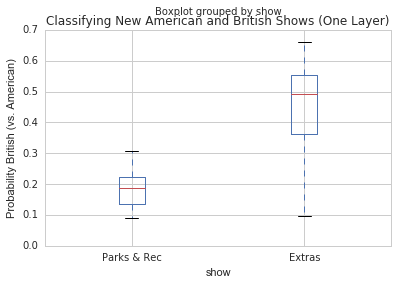

In [110]:
single_df=pd.DataFrame({'proba':np.reshape(single_test_proba,len(single_test_proba),1), \
                        'episode':test_episode,'show':test_y_data})
single_df.groupby('episode').mean().boxplot(column='proba',by='show')
plt.ylabel('Probability British (vs. American)')
plt.xticks(range(1,3),['Parks & Rec','Extras'])
plt.title('Classifying New American and British Shows (One Layer)')

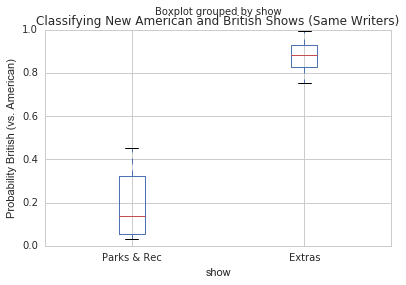

In [109]:
double_df=pd.DataFrame({'proba':np.reshape(double_test_proba,len(double_test_proba),1), \
                        'episode':test_episode,'show':test_y_data})
double_df.groupby('episode').mean().boxplot(column='proba',by='show')
plt.ylabel('Probability British (vs. American)')
plt.xticks(range(1,3),['Parks & Rec','Extras'])
plt.title('Classifying New American and British Shows (Two Layer)')

The improvement brought by adding the second LSTM layer suggests that long-term sequential structure helps distinguish which shows are British and which are American (and not just vocabulary or word-to-word conditional probabilities).